# FEATURES ENGINEERING


In [1]:
!pip install dirty_cat==0.1.0

     |████████████████████████████████| 111 kB 15.5 MB/s 


In [192]:
!pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


## Import Data

In [221]:
from dirty_cat.datasets import fetch_employee_salaries
from dirty_cat import SimilarityEncoder

import pandas as pd
import numpy as np
import seaborn as sns

In [222]:
data = fetch_employee_salaries()["data"]

In [226]:
data["Date First Hired"] = pd.to_datetime(data["date_first_hired"])
data["Year First Hired"] = data["Date First Hired"].apply(lambda x: x.year)
# drop rows with NaN in gender
data.dropna(subset=["gender"], inplace=True)

In [227]:
# 5 fisrt informations 
data.head(5)

,full_name,gender,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,Current Annual Salary,Date First Hired,Year First Hired
0,"Aarhus, Pam J.",F,71225.98,416.10,POL,Department of Police,MSB Information Mgmt and Tech Division Records...,Fulltime-Regular,Office Services Coordinator,None,09/22/1986,1986.0,69222.18,1986-09-22,1986
1,"Aaron, David J.",M,103088.48,3326.19,POL,Department of Police,ISB Major Crimes Division Fugitive Section,Fulltime-Regular,Master Police Officer,None,09/12/1988,1988.0,97392.47,1988-09-12,1988
2,"Aaron, Marsha M.",F,107000.24,1353.32,HHS,Department of Health and Human Services,Adult Protective and Case Management Services,Fulltime-Regular,Social Worker IV,None,11/19/1989,1989.0,104717.28,1989-11-19,1989
3,"Ababio, Godfred A.",M,57819.04,3423.07,COR,Correction and Rehabilitation,PRRS Facility and Security,Fulltime-Regular,Resident Supervisor II,None,05/05/2014,2014.0,52734.57,2014-05-05,2014
4,"Ababu, Essayas",M,95815.17,NaN,HCA,Department of Housing and Community Affairs,Affordable Housing Programs,Fulltime-Regular,Planning Specialist III,None,03/05/2007,2007.0,93396.00,2007-03-05,2007


In [228]:
df=pd.DataFrame()
data.dtypes

full_name                          object
gender                           category
2016_gross_pay_received           float64
2016_overtime_pay                 float64
department                       category
department_name                  category
division                           object
assignment_category              category
employee_position_title            object
underfilled_job_title              object
date_first_hired                   object
year_first_hired                  float64
Current Annual Salary             float64
Date First Hired           datetime64[ns]
Year First Hired                    int64
dtype: object

In [229]:
# columns 
data.columns


Index(['full_name', 'gender', '2016_gross_pay_received', '2016_overtime_pay',
       'department', 'department_name', 'division', 'assignment_category',
       'employee_position_title', 'underfilled_job_title', 'date_first_hired',
       'year_first_hired', 'Current Annual Salary', 'Date First Hired',
       'Year First Hired'],
      dtype='object')

In [230]:
#Numeric data
data._get_numeric_data().columns

Index(['2016_gross_pay_received', '2016_overtime_pay', 'year_first_hired',
       'Current Annual Salary', 'Year First Hired'],
      dtype='object')

In [231]:
#Nominal and categorical data
for j in range(len(data._get_numeric_data().columns)):
 NominalCategoricalColumns= [x for x in data.columns if x != data._get_numeric_data().columns[j]]
NominalCategoricalColumns

['full_name',
 'gender',
 '2016_gross_pay_received',
 '2016_overtime_pay',
 'department',
 'department_name',
 'division',
 'assignment_category',
 'employee_position_title',
 'underfilled_job_title',
 'date_first_hired',
 'year_first_hired',
 'Current Annual Salary',
 'Date First Hired']

## Label encoder 

### Encodage de toutes les données

In [232]:
from sklearn.preprocessing import LabelEncoder
try :
  paseur=LabelEncoder()
  Data=pd.DataFrame()
  for i in data.columns:
    Data[i]=paseur.fit_transform(data[i])
except TypeError:
  pass
Data

,full_name,gender,2016_gross_pay_received,2016_overtime_pay,department,department_name,division,assignment_category,employee_position_title,underfilled_job_title,date_first_hired,year_first_hired,Current Annual Salary,Date First Hired,Year First Hired
0,0,0,3888,601,32,14,368,0,237,83,1634,20,1717,329,20
1,1,1,7013,2078,32,14,309,0,225,83,1575,22,2801,463,22
2,2,0,7370,1261,19,10,18,0,340,83,2038,23,2931,547,23
3,3,1,2360,2111,6,4,435,0,297,83,749,48,830,2141,48
4,4,1,6385,6173,18,11,21,0,245,83,404,41,2681,1735,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,9195,0,2394,6173,19,10,539,0,45,83,1930,49,1863,2222,49
9207,9196,0,8847,1028,17,20,290,0,138,83,2091,22,3357,480,22
9208,9197,1,7156,6173,19,10,83,1,230,83,716,35,2904,1307,35
9209,9198,1,8635,6173,3,6,110,0,221,83,1528,40,3315,1699,40


#loop pour vérification sur une échantillon

In [233]:
sample=data['employee_position_title']
sample = sample.values
sample = sample[:10]
sample

array(['Office Services Coordinator', 'Master Police Officer',
       'Social Worker IV', 'Resident Supervisor II',
       'Planning Specialist III', 'Police Officer III',
       'Accountant/Auditor II', 'Administrative Specialist II',
       'Firefighter/Rescuer III', 'Police Aide'], dtype=object)

In [133]:
labelenc_=paseur.fit_transform(sample)
labelenc_

array([4, 3, 9, 8, 5, 7, 0, 1, 2, 6])

In [234]:
labelencdf_ = pd.DataFrame(labelenc_, index=sample.ravel())
labelencdf_

,0
Office Services Coordinator,4
Master Police Officer,3
Social Worker IV,9
Resident Supervisor II,8
Planning Specialist III,5
Police Officer III,7
Accountant/Auditor II,0
Administrative Specialist II,1
Firefighter/Rescuer III,2
Police Aide,6


## One-hot Encoder

In [235]:
from sklearn.preprocessing import OneHotEncoder
paseur = OneHotEncoder(sparse=False)
onehot = paseur.fit_transform(sample.reshape(-1, 1))
onehot

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [236]:
onehot_df = pd.DataFrame(onehot, index=sample.ravel())
onehot_df

,0,1,2,3,4,5,6,7,8,9
Office Services Coordinator,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Master Police Officer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Social Worker IV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Resident Supervisor II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Planning Specialist III,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Police Officer III,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Accountant/Auditor II,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Administrative Specialist II,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Firefighter/Rescuer III,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Police Aide,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Similarity Encoding

In [237]:
paseur = SimilarityEncoder(similarity="ngram")
X_enc = paseur.fit_transform(sample.reshape(-1, 1))
X_enc

array([[0.05882353, 0.03125   , 0.02739726, 0.19008264, 1.        ,
        0.01351351, 0.05555556, 0.20535714, 0.08088235, 0.032     ],
       [0.008     , 0.02083333, 0.056     , 1.        , 0.19008264,
        0.02325581, 0.23076923, 0.56      , 0.01574803, 0.02777778],
       [0.03738318, 0.07317073, 0.05405405, 0.02777778, 0.032     ,
        0.0733945 , 0.        , 0.0625    , 0.06542056, 1.        ],
       [0.11206897, 0.07142857, 0.09756098, 0.01574803, 0.08088235,
        0.07142857, 0.03125   , 0.08108108, 1.        , 0.06542056],
       [0.04761905, 0.3539823 , 0.06976744, 0.02325581, 0.01351351,
        1.        , 0.02      , 0.09821429, 0.07142857, 0.0733945 ],
       [0.0733945 , 0.05343511, 0.14953271, 0.56      , 0.20535714,
        0.09821429, 0.26086957, 1.        , 0.08108108, 0.0625    ],
       [1.        , 0.05      , 0.06451613, 0.008     , 0.05882353,
        0.04761905, 0.01052632, 0.0733945 , 0.11206897, 0.03738318],
       [0.05      , 1.        , 0.0337837

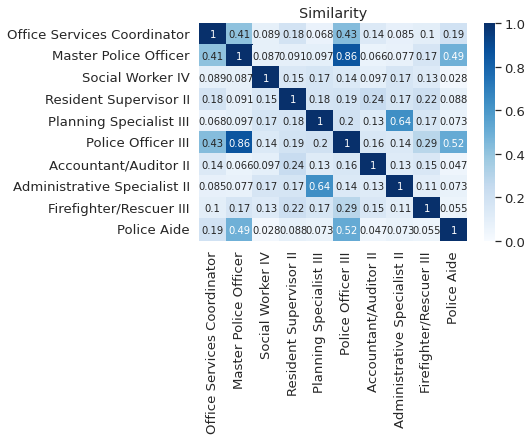

In [238]:
from sklearn.preprocessing import normalize
def plot_similarity(labels, features):
    normalized_features = normalize(features)
    corr = np.inner(normalized_features, normalized_features)
    sns.set(font_scale=1.2)
    g = sns.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap='Blues',
        annot=True,
        annot_kws={"size": 10},
    )
    g.set_xticklabels(labels, rotation=90)
    g.set_title("Similarity")


def encode_and_plot(labels):
    paseur = SimilarityEncoder(similarity="ngram")
    X_enc = paseur.fit_transform(labels.reshape(-1, 1))
    plot_similarity(labels, X_enc)
encode_and_plot(sample)

## Compaison

One-hot Encoding vs Similarity Encoding

In [239]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeCV

In [241]:
paseur=LabelEncoder()
y = paseur.fit_transform(data["Current Annual Salary"].values)

In [240]:
clean_columns = {
    "gender": "one-hot",
    "department_name": "one-hot",
    "assignment_category": "one-hot",
    "Year First Hired": "numerical",
}

In [242]:
encoding_methods = ["one-hot", "similarity"]

In [243]:
encoders_dict = {
    "one-hot": OneHotEncoder(handle_unknown="ignore", sparse=False),
    "similarity": SimilarityEncoder(similarity="ngram"),
     "numerical": FunctionTransformer(None),
   
}

In [244]:
dirty_column='employee_position_title'
def make_pipeline(encoding_method):
    # static transformers from the other columns
    transformers = [
        (enc + "_" + col, encoders_dict[enc], [col])
        for col, enc in clean_columns.items()
    ]
    # adding the encoded column
    transformers += [(encoding_method, encoders_dict[encoding_method], [dirty_column])]
    pipeline = Pipeline(
        [
            # Use ColumnTransformer to combine the features
            ("union", ColumnTransformer(transformers=transformers, remainder="drop")),
            ("scaler", StandardScaler(with_mean=False)),
            ("clf", RidgeCV()),
        ]
    )
    return pipeline

In [245]:
all_scores = dict()

cv = KFold(n_splits=5, random_state=12, shuffle=True)
scoring = "r2"
for method in encoding_methods:
    pipeline = make_pipeline(method)
    scores = cross_val_score(pipeline, data, y, cv=cv, scoring=scoring)
    print(f"{method} encoding")
    print(f"{scoring} score:  mean: {np.mean(scores):.3f}; std: {np.std(scores):.3f}\n")
    all_scores[method] = scores

one-hot encoding
r2 score:  mean: 0.871; std: 0.009

similarity encoding
r2 score:  mean: 0.883; std: 0.004

